In [157]:
# 모듈 임포트
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [158]:
# 데이터셋 호출
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 확인
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [159]:
# 라벨의 갯수 확인
# 0: 비행기, 1: 자동차, 2: 새, 3: 고양이, 4: 사슴, 5: 개, 6: 개구리, 7: 말, 8: 배, 9: 트럭
import collections

# 테스트 데이터 라벨 개수 확인
test_label_counts = collections.Counter(test_labels.flatten())
print('Test labels distribution: ', test_label_counts)

Test labels distribution:  Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})


In [160]:
# 하나의 이미지 확인
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

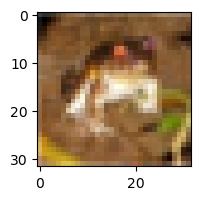

In [161]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[0])
plt.show()

In [162]:
# 데이터 정규화
# 255로 나눠서 0 ~ 1 사이의 값을 갖도록 한다.
# 이미지는 32 * 32 컬러 이미지 데이터
train_images = train_images / 255.0
test_images = test_images / 255.0

test_images[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [163]:
# 훈련 데이터와 검증 데이터 분리
# 5000개의 데어터를 검증 데이터 사용
val_images = train_images[45000:]
val_labels = train_labels[45000:]

train_images = train_images[:45000]
train_labels = train_labels[:45000]

print(val_images.shape, train_images.shape)

(5000, 32, 32, 3) (45000, 32, 32, 3)


In [164]:
# 합성곱 신경망 구성
# 드롭아웃률을 조정해서 랜덤하게 뉴런을 꺼주고, 과적합 현상을 방지
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

cnn_model = Sequential([
    # 32: 필터 개수
    # (3, 3): 필터 사이즈
    # padding="same": 패딩은 이미지의 가장자리에 지정된 개수의 픽셀만큼 행과 열을 추가
    # same: 입력 이미지와 출력 이미지의 사이즈가 같도록 지정
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),

    # 풀링 사이즈 지정
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Flatten(),

    # 학습 과정에서 무작위로 선택된 30%의 뉴런을 일시적으로 비활성화 하여 과적합 방지
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [165]:
# 모델 컴파일
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [166]:
# # 모델을 학습할 때 얼마만큼 돌려야 과대소 적합을 피할 수 있는지 적절한 값을 알 수 없다.
# # 따라서 콜백을 사용해서 특정 시점에 학습을 정지 시키고, 최적치의 모델 파일을 추출한다.

# # monitor: 적절한 시점을 판단할 기준을 val_loss 로 정하고, 값이 떨어지거나 안변하는 횟수가 5회 일 때 정지한다.
# earyl_stopping = EarlyStopping(monitor='val_loss', patience=5)

# # 가장 성능이 좋다고 기록된 모델 저장
# save_best_only = ModelCheckpoint('best_cnn_model.keras', save_best_only=True)

# # 모델 학습
# hitory = cnn_model.fit(train_images, train_labels, batch_size=512, epochs=100, validation_data=(val_images, val_labels), callbacks=[earyl_stopping, save_best_only])

In [167]:
from tensorflow.keras.models import load_model 

# 모델 불러오기 
cnn_model = load_model('best_cnn_model.keras')

# 모델 평가 
cnn_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7638 - loss: 0.6932


[0.7086867094039917, 0.7627000212669373]

In [168]:
# 예측 결과 시각화 

predicted_labels = cnn_model.predict(test_images)
predicted_labels.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


(10000, 10)

In [169]:
# 레이블 값 중 가장 큰 값을 가지는 색인을 뽑아 예측 레이블로 사용 
import tensorflow as tf 

predicted_labels = tf.argmax(predicted_labels, axis=1) 
predicted_labels

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([3, 8, 8, ..., 5, 4, 7], dtype=int64)>

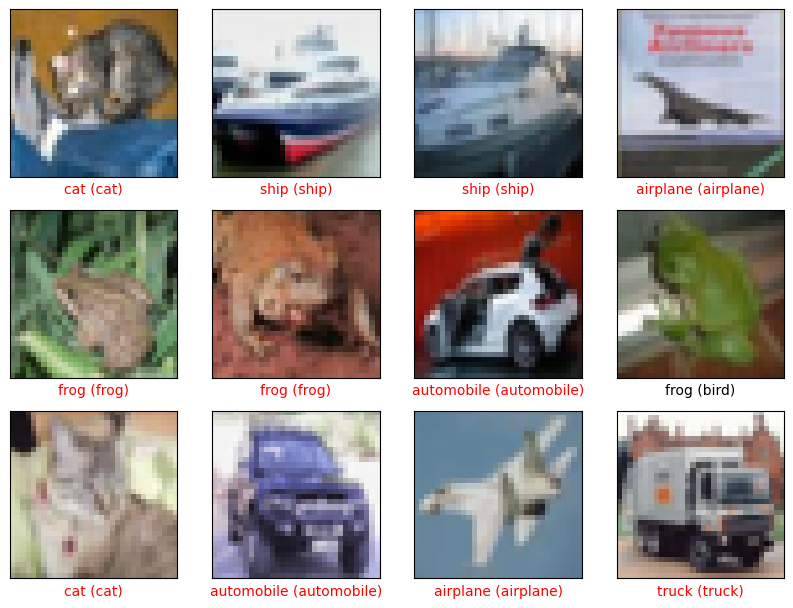

In [172]:

# 정수 값에 클래스 이름을 대응시켜 딕셔너리 반환
label_to_name = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

# 테스트 이미지에 대한 실젯값과 예측값 비교 및 시각화 
plt.figure(figsize=(10,10))

for i in range(12):
    plt.subplot(4,4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    xlabel = f"{label_to_name[int(test_labels[i][0])]} ({label_to_name[int(predicted_labels[i])]})"
    
    plt.xlabel(xlabel, color="red" if test_labels[i][0] == predicted_labels[i] else 'black')